# Unsupervised Learning

This is the Clustering and Dimensionality Reduction exercise. 

In [14]:
import numpy as np
import matplotlib.pyplot as plt

We will go back to the hand-written digits example and try to detect patterns in the data to see which digits are similar. 

Fortunately, `scikit-learn` provides a dataset that fits this example.

We will use Dimensionality Reduction to visualize the data and to find the most important dimensions. 

Then, we will explore Clustering algorithms to find the patterns that help us distinguish the 10 digits.

In [1]:
from sklearn.datasets import load_digits

In [2]:
# We load the dataset
digits = load_digits()

In [4]:
# It is a dictionary with multiple keys
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [6]:
# We print the DESCR value to get the description of the dataset
print( digits["DESCR"] )

# Below, you can see that the attributes we can use are images. Each images has a 8 x 8 pixel size.

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

## Pre-processing
To facilitate the data processing, we first standardize the data by centering and scaling it to unit variance.

The details are not important for this tutorial, we will discuss them on the lecture of Exploratory Data Analysis.

In [8]:
from sklearn.preprocessing import scale

In [9]:
# Pre-process the data
data = scale(digits.data)

In [10]:
# We look at the 11th image to see how the data looks like after the pre-processing steps
data[10]

array([ 0.        , -0.33501649, -0.88456568, -0.66762355,  0.7353655 ,
        0.92114526, -0.40972392, -0.12502292, -0.05907756, -0.62400926,
        0.1139672 ,  1.01110394, -0.4767178 ,  0.96246672,  1.15849796,
       -0.13043338, -0.04462507, -0.16825361,  1.07165259,  0.51839509,
       -1.14964846,  0.19266199,  2.21280958, -0.11422184, -0.03337973,
       -0.46720661,  1.11605583, -0.81977955, -1.61406277,  0.07639777,
        1.54181413, -0.04723238,  0.        ,  0.47724997,  1.31786694,
       -0.80933017, -1.73666443, -0.1267705 ,  1.43955804,  0.        ,
       -0.06134367, -0.19582467,  1.39509519, -0.34600957, -1.06623158,
        0.48533949, -0.10539096, -0.08874162, -0.03543326, -0.40357499,
        0.79622602,  0.47091593,  0.11012973,  0.20590738, -0.75743581,
       -0.20978513, -0.02359646, -0.29908135, -0.89336612, -0.47766056,
        0.24143046, -0.63808502, -0.5056698 , -0.19600752])

In [11]:
# The shape shows us that we have 1797 hand-written digits with 64 features or attributes (based on 8 x 8 images)
data.shape

(1797, 64)

In [12]:
n_samples, n_features = data.shape

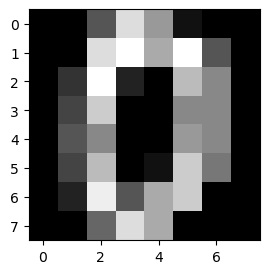

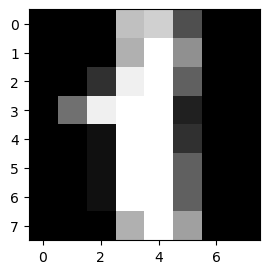

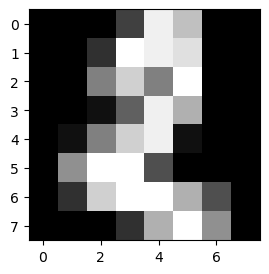

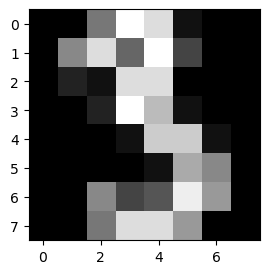

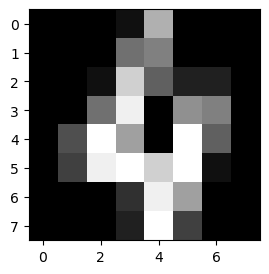

In [16]:
# We now use matplotlib to visualize the first 5 images with grayscale values
for i in range(0, 5):
    plt.figure(1, figsize=(3,3)) # Each image is a hand-written digit
    plt.imshow( digits.images[i], cmap=plt.cm.gray, interpolation="nearest" )
    plt.show()

## Dimensionality Reduction
We will use the PCA method to reduce the 64 features of each image to only 2 features.

In [17]:
from sklearn.decomposition import PCA

In [18]:
# We will reduce the data by reducing to 2 dimensions
reduced_data = PCA(n_components = 2).fit_transform(data)

# The fit_transform function allows us to fit the model and do the predictions in one step

In [20]:
# Now, we can print the old first image 
data[0]

array([ 0.        , -0.33501649, -0.04308102,  0.27407152, -0.66447751,
       -0.84412939, -0.40972392, -0.12502292, -0.05907756, -0.62400926,
        0.4829745 ,  0.75962245, -0.05842586,  1.12772113,  0.87958306,
       -0.13043338, -0.04462507,  0.11144272,  0.89588044, -0.86066632,
       -1.14964846,  0.51547187,  1.90596347, -0.11422184, -0.03337973,
        0.48648928,  0.46988512, -1.49990136, -1.61406277,  0.07639777,
        1.54181413, -0.04723238,  0.        ,  0.76465553,  0.05263019,
       -1.44763006, -1.73666443,  0.04361588,  1.43955804,  0.        ,
       -0.06134367,  0.8105536 ,  0.63011714, -1.12245711, -1.06623158,
        0.66096475,  0.81845076, -0.08874162, -0.03543326,  0.74211893,
        1.15065212, -0.86867056,  0.11012973,  0.53761116, -0.75743581,
       -0.20978513, -0.02359646, -0.29908135,  0.08671869,  0.20829258,
       -0.36677122, -1.14664746, -0.5056698 , -0.19600752])

In [21]:
#... and the new reduced version of the image. Now we have 2 instead of 64 features!
reduced_data[0]

array([ 1.91421485, -0.95452587])

### Outcome: Dimensionality Reduction helped us simplify our dataset.

We reduced each image into 2 features. With only 2 features, we could plot the images on a scatterplot. The closer the points are to each other, the more similar 2 hand-written digits are.

In [24]:
# We define a Python function, using matplotlib, to facilitate the plotting of all images in the dataset
def plot_data( reduced_data ):
    x_min, x_max = reduced_data[:,0].min() - 1, reduced_data[:,0].max() + 1
    y_min, y_max = reduced_data[:,1].min() - 1, reduced_data[:,1].max() + 1
    
    plt.figure(1)
    plt.clf()
    
    plt.plot(reduced_data[:,0], reduced_data[:,1], 'k.', markersize=2)
    
    plt.title("Reduced dataset (2 dimensions)")
    
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xticks(())
    plt.yticks(())
    
    plt.show()

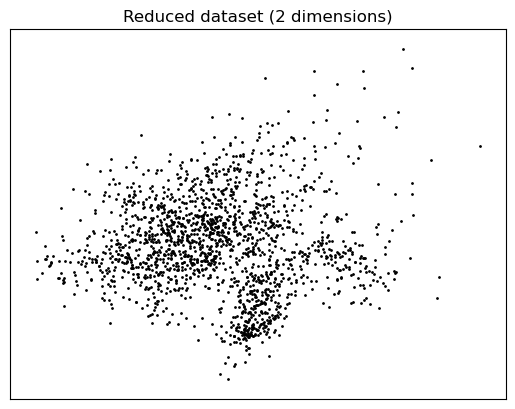

In [25]:
# We use the function to plot the data
plot_data(reduced_data)

## Clustering

With our 2D data, we can now apply a clustering methods to group the 1797 images according to the digit.

In [26]:
# We will apply K-Means
from sklearn.cluster import KMeans

In [28]:
# Since we know that digits can only go from 0 to 9, we can set the parameter K to 10 clusters
kmeans = KMeans(n_clusters = 10, n_init='auto') # However, the K value is often not so obvious in real-world tasks
kmeans.fit(reduced_data)

KMeans(n_clusters=10, n_init='auto')

In [29]:
# We can now see what clusters are assigned to the first 5 images
reduced_data[0:5]

array([[ 1.91421485, -0.95452587],
       [ 0.58897926,  0.92462609],
       [ 1.30204966, -0.31731457],
       [-3.02076935, -0.86873606],
       [ 4.52894293, -1.09343721]])

In [30]:
# Keep in mind that the K value printed here is just an ID and does not necessarily match the value of the hand-written digit
kmeans.predict(reduced_data[0:5])

array([0, 0, 0, 1, 3])

In [64]:
# Clusters are always easiest to distinguish through data visualization
# Let's create a function to plot them with matplotlib
def plot_kmeans(reduced_data, kmeans):
    x_min, x_max = reduced_data[:,0].min() - 1, reduced_data[:,0].max() + 1
    y_min, y_max = reduced_data[:,1].min() - 1, reduced_data[:,1].max() + 1
    xx,yy = np.meshgrid( np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02) )
    
    kmeans.cluster_centers_ = kmeans.cluster_centers_.astype(float)
    # We predict the cluster for each of the data points
    Z = kmeans.predict(np.c_[xx.ravel(),yy.ravel()] ).reshape(xx.shape)

    plt.figure(1)
    plt.clf()
    

    plt.imshow(Z, interpolation="nearest",
              extent=( xx.min(),xx.max(), yy.min(), yy.max() ),
              cmap = plt.cm.Paired,
              aspect="auto", origin="lower" )

    plt.plot(reduced_data[:,0], reduced_data[:,1], 'k.', markersize=2)
    
    centroids = kmeans.cluster_centers_
    # We visualize the center points used to best divide the 2D space into the K clusters
    plt.scatter(centroids[:,0], centroids[:,1],
               marker="x", linewidth=3, color="w", zorder=10)
    
    plt.title("Reduced dataset (2 dimensions)")
    
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xticks(())
    plt.yticks(())
    
    plt.show()

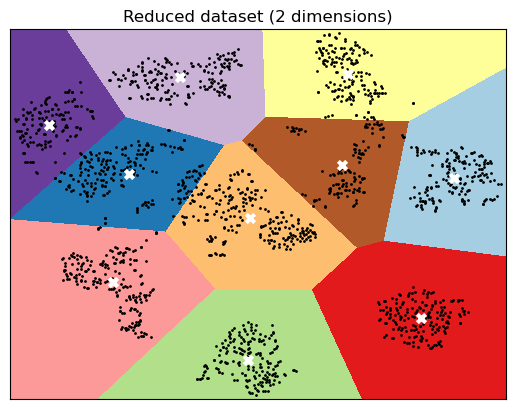

In [65]:
# The white Xs show the centroids of each cluster used by K-means
plot_kmeans(reduced_data, kmeans)

### Dimensionality Reduction: Same task, with t-SNE instead of PCA

We try a non-linear reduction approach, t-SNE, to see if it does a better job at processing the images to facilitate the clustering.

In [54]:
from sklearn.manifold import TSNE

In [55]:
reduced_data_tsne = TSNE(n_components=2).fit_transform(data)

In [58]:
# We apply K-means to the newly reduced data with t-SNE
kmeans_tsne = KMeans(n_clusters = 10, n_init='auto')

# This may take longer to run as PCA because it is more computationally intensive
kmeans_tsne.fit(reduced_data_tsne)

KMeans(n_clusters=10, n_init='auto')

In [62]:
kmeans_tsne.predict(reduced_data_tsne[0:5])

array([0, 3, 6, 4, 7])

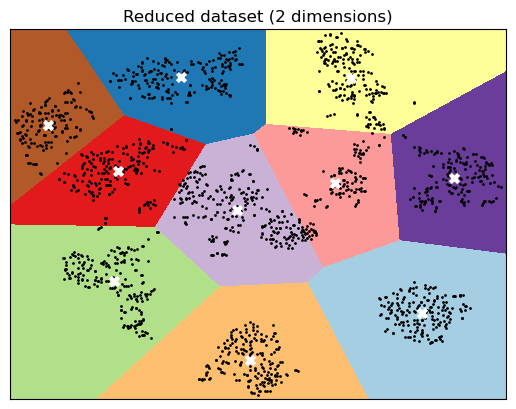

In [66]:
# Now we plot the cluster to see the new result
plot_kmeans(reduced_data_tsne, kmeans_tsne)

# Tasks
- These methods do not only work with image data. You could apply them to the Breast Cancer dataset, for example.
- Furthermore, you could also apply K-means without reducing the dimensions beforehand. However, it would be harder to inspect the data according to the clusters, given that the visualization options for more than 3 dimensions are limited.
- Now you know 4 different approaches for ML that you could explore and apply in your project. Consider what kind of problems you could solve with them.